Clase 4/07/2023

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Distribución Exponencial

$$ f(x,\lambda) =  $$

In [41]:
def fexp(x, λ):
    if x >=0:
        return λ * np.exp(-λ * x)
    else:
        return 0 

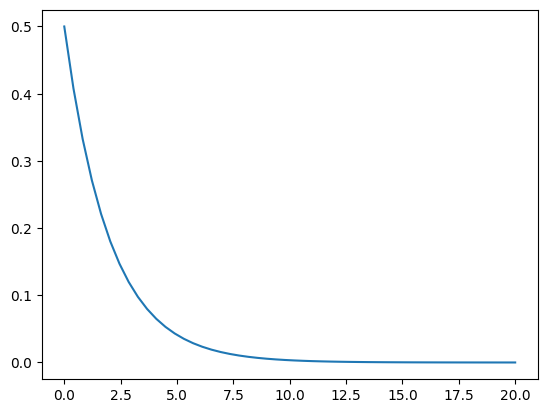

In [42]:
t = np.linspace(0, 20)
y = [fexp(n , 0.5) for n in t]

plt.plot(t , y)
plt.show()

*Ejemplo:*

Simular la llegada de clientes a una sucursal donde llega un cliente cada dos(2) minutos. $ \lambda = \frac {1}{2} = \frac {1  \text{cliente}}{2 \text{ minutos}} = 0.5 $. Voy a hacer una simulaciòn durante 60 minutos.

Comparo el resultado con el que se obtiene al generar 10000 tiempos para llegadas de clientes siguiendo una distribucion exponencial.

In [34]:
λ = 0.5 # Número de clientes por minuto
tiempo_total = 60

np.random.seed(100)
intervalos_tiempo = np.random.exponential(scale= 1/λ, size= 10**4) # Tiempo promedio entre dos eventos suscesivos
tiempo_llegada = np.cumsum(intervalos_tiempo) # cumsum genera un arreglo con una suma acumulada

In [35]:
intervalos_tiempo.mean()

1.99383007531525

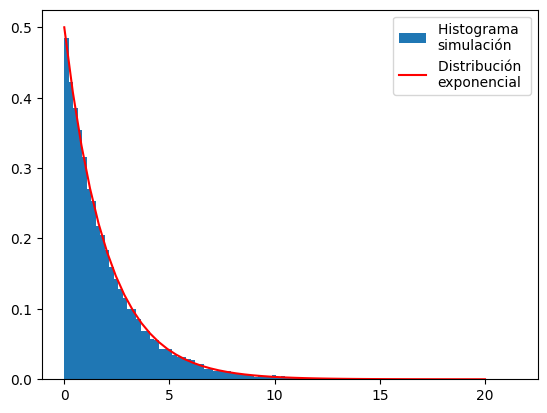

In [47]:
plt.hist(intervalos_tiempo, bins=100, density= True, label='Histograma \nsimulación')
plt.plot(t, y, color='red', label='Distribución \nexponencial')
plt.legend()
plt.show()

In [48]:
intervalos_tiempo[:10]

array([1.56791674, 0.65248377, 1.10509323, 3.72577379, 0.00946005,
       0.25923611, 2.22187032, 3.49570821, 0.29400131, 1.71177147])

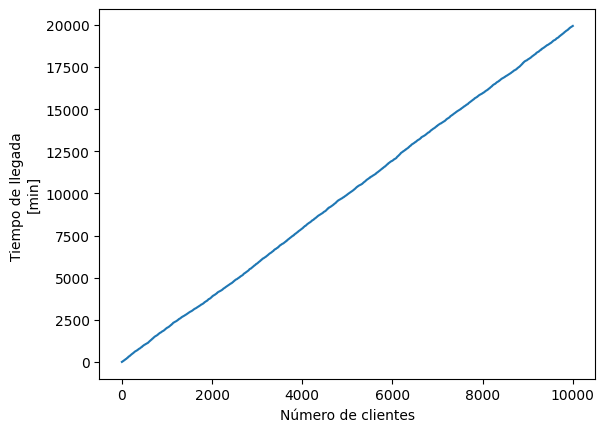

In [52]:
plt.plot(range(10**4), tiempo_llegada)
plt.xlabel('Número de clientes')
plt.ylabel('Tiempo de llegada \n[min]')
plt.show()

Ahora vamos a simular la llegada de clientes durante una hora ( 60 minutos)

In [86]:
λ = 0.5 
tiempo_total = 60

np.random.seed(100)
intervalos_tiempo = [np.random.exponential(scale= 1/λ)] 

while np.array(intervalos_tiempo).sum() <= tiempo_total:
    intervalos_tiempo.append(np.random.exponential(scale= 1/λ))

tiempo_llegada = np.cumsum(intervalos_tiempo)


In [78]:
len(intervalos_tiempo)

36

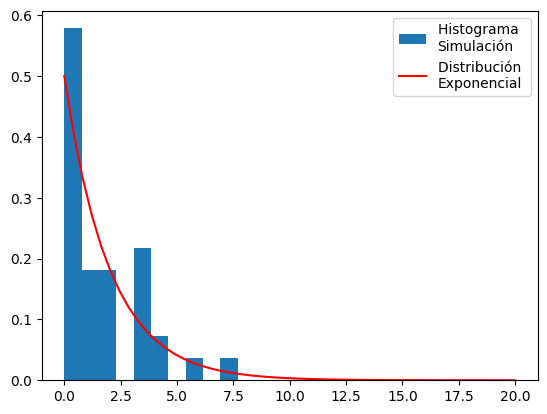

In [75]:
plt.hist(intervalos_tiempo, density= True, label= 'Histograma \nSimulación')
plt.plot(t, y, color='red', label= 'Distribución \nExponencial')
plt.legend()
plt.show()

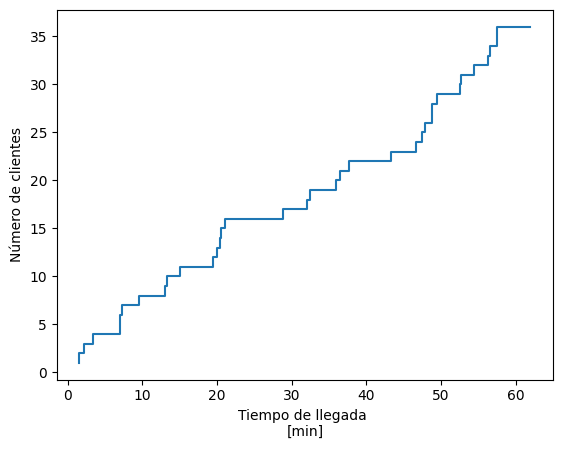

In [85]:
plt.step(tiempo_llegada, np.arange(1, len(tiempo_llegada) + 1))
plt.xlabel('Tiempo de llegada \n[min]')
plt.ylabel('Número de clientes')
plt.show()

¿Qué tiene que ver este resultado con la distribución de Poisson?

In [87]:
λ = 0.5 
tiempo_total = 60

iter = 10**5
clientes = []

for n in range(iter):
    intervalos_tiempo = [np.random.exponential(scale= 1/λ)] 
    
    while np.array(intervalos_tiempo).sum() <= tiempo_total:
        intervalos_tiempo.append(np.random.exponential(scale= 1/λ))

    clientes.append(len(intervalos_tiempo))

Si llegan un cliente cada dos minutos. La rata de llegada es $\lambda = \frac{1}{2} $. Si consideramos un tiempo total de $ t= 60min$, se estima que en promedio llegarán $\lambda*t = \frac{1}{2}*60 = 30$

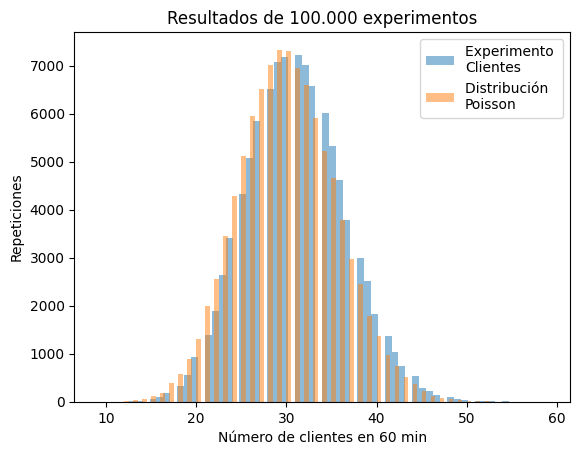

In [102]:
z = np.random.poisson(lam =30, size= iter) # lam = 30
plt.hist(clientes, bins=60, alpha = 0.5, label= 'Experimento \nClientes')
plt.hist(z, bins = 100, alpha= 0.5, label= 'Distribución \nPoisson')
plt.xlabel('Número de clientes en 60 min')
plt.ylabel('Repeticiones')
plt.title('Resultados de 100.000 experimentos')
plt.legend()
plt.show()

In [98]:
np.array(clientes).max()
print(f'Máximo clientes = {np.array(clientes).max()}')
print(f'Mínimo clientes = {np.array(clientes).min()}')
print(f'Promedio clientes = {np.array(clientes).mean().round(0)}')

Máximo clientes = 57
Mínimo clientes = 11
Promedio clientes = 31.0
